# Prueba Técnica - Talento B
# Sobre TRM USD-COP
# Solución

### Santiago Galvis Duque

In [93]:
# Importando Librerias

# Para analisis de datos
import numpy as np 
import pandas as pd

# Para graficos
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Cargando Dataset desde carpeta Data

Los datos fueron descargados desde la página de [datos.gov.co](https://www.datos.gov.co/Econom-a-y-Finanzas/Tasa-de-Cambio-Representativa-del-Mercado-Historic/mcec-87by/data_preview) en formato .csv. De ellos se extraerá las primeras 1000 filas, haciendo referencia a los últimos 1000 días.

In [94]:
# Cargando el Dataframe con los datos de la tasa de cambio
df_ = pd.read_csv('../../Data/TRM_USD-COP.csv')
df_ = df_.iloc[:1000] # Seleccionando solo las últimas 1000 filas

# Creando un nuevo DataFrame con las columnas que se van a utilizar
df = pd.DataFrame()

# Seleccionando las columnas que se van a utilizar
df.loc[:,'fecha'] = pd.to_datetime(df_['VIGENCIADESDE'], format='%d/%m/%Y') # Convirtiendo la fecha a formato datetime
df.loc[:,'fechaF'] = pd.to_datetime(df_['VIGENCIADESDE'], format='%d/%m/%Y').dt.strftime('%m-%Y') # Convirtiendo fecha a formato mes-año
df.loc[:,'valor'] = df_['VALOR'].round(4) # Redondeando el valor a 4 decimales
df.head() # Mostrando lss primeras filas

,fecha,fechaF,valor
0,2024-11-23,11-2024,4418.58
1,2024-11-22,11-2024,4387.09
2,2024-11-21,11-2024,4414.06
3,2024-11-20,11-2024,4401.34
4,2024-11-19,11-2024,4400.69


### 2. Encontrando el Miércoles con valor de cierre más alto

Para esto vamos a aprovechar el caracter columnar de un Dataframe, por tanto crearemos una Máscara booleana que nos permita seleccionar los días de la semana que sean Miércoles. Utilizamos el atributo `dt.day_of_week` el cual traduce la fecha en datetime a días de la semana de 0 a 6 comenzando por el Lunes, así, el código asignado para el Miércoles es 2. Solo resta hacer la consulta al Dataframe filtrado usando la función `max()` para la columna **valor** y por último buscar a qué índice corresponde el valor máximo encontrado.

In [95]:
# Creando Máscara Booleana para seleccionar los datos de los días miércoles
Mask_es_Miercoles =  (df['fecha'].dt.day_of_week == 2)

# Seleccionando los datos de los días miércoles
df_es_Miercoles = df[Mask_es_Miercoles]

# Buscando el máximo valor de la tasa de cambio en los días miércoles
Valor_max_miercoles = df_es_Miercoles['valor'].max()

# Buscando a qué fecha corresponde el máximo valor de la tasa de cambio en los días miércoles
Dia_max_miercoles = df_es_Miercoles.loc[df_es_Miercoles['valor'].idxmax()]['fecha'].date().strftime('%d-%m-%Y') # Concvirtiendo a str

print(f'El máximo valor de la tasa de cambio en los días Miércoles es {Valor_max_miercoles} y se presentó el {Dia_max_miercoles}')

El máximo valor de la tasa de cambio en los días Miércoles es 5013.2 y se presentó el 09-11-2022


### 3. Promedio de la TRM mensual

La mejor parte de tener Datasets de tipo serie de tiempo es que podemos agrupar las variables por cualquier intervalo temporal, de esta forma, usaremos el método `groupby` de pandas para agrupar primero por año y luego por mes en cada año. Luego se calcula el promedio para cada agrupación.

In [96]:
# Agrupando el Dataset por año y luego por mes en cada año
df_a_o_mes = df.groupby([df['fecha'].dt.year,df['fecha'].dt.month])

# Calculando el valor promedio de la tasa de cambio por mes, redondeando a 4 decimales
Promedio_mes = df_a_o_mes['valor'].mean().round(4)

# Mostrando los primeros 10 valores 
Promedio_mes.head(10)

fecha  fecha
2020   9        3768.1541
       10       3834.2186
       11       3675.2075
       12       3468.5038
2021   1        3503.1267
       2        3557.7874
       3        3616.6471
       4        3651.8530
       5        3741.9625
       6        3691.8284
Name: valor, dtype: float64

Grafiquemos el resultado para una mejor comprensión.

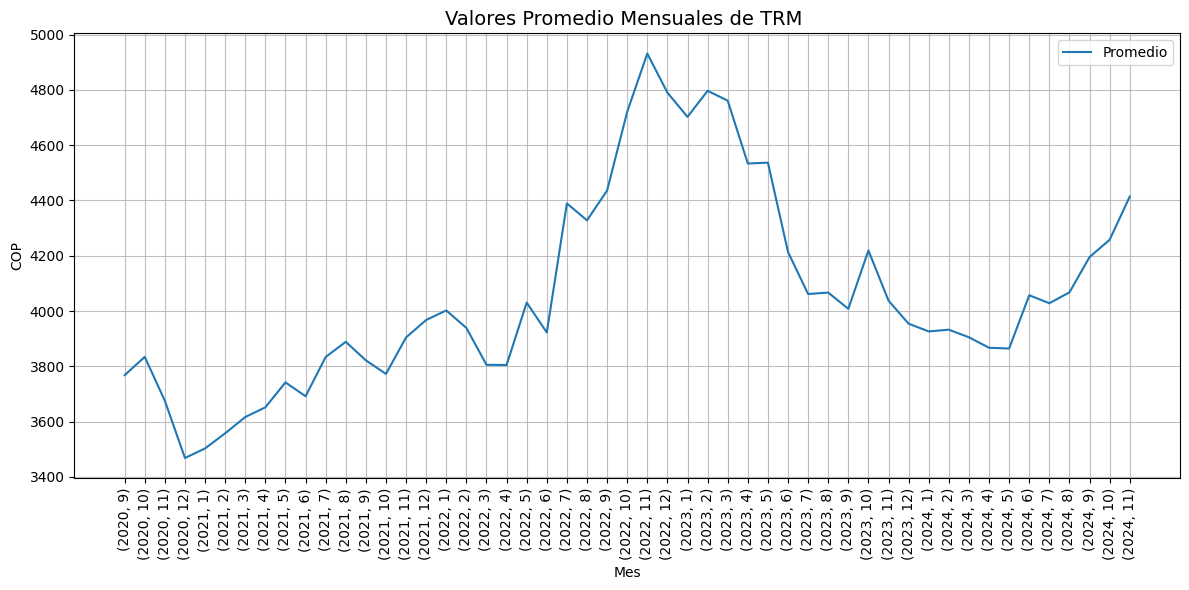

In [97]:
# Crear gráfico
fig, ax = plt.subplots(figsize=(12, 6))
x = range(len(Promedio_mes))
ax.plot(x, Promedio_mes.values,label = 'Promedio')

# Personalizando el gráfico
ax.set_title('Valores Promedio Mensuales de TRM ', fontsize=14)
ax.set_xlabel('Mes',fontsize=10)
ax.set_ylabel('COP',fontsize=10)
ax.set_xticks(x)
ax.set_xticklabels(Promedio_mes.keys(), rotation=90)
ax.legend()
ax.grid( alpha=0.8)

plt.tight_layout()
plt.show()

### 4. Calculando el valor más alto de TRM para cada mes par.

Combinando las dos funcionalidades usadas anteriormente, debemos crear una máscara booleana para seleccionar todos los meses pares y agrupar por año y mes para finalmente calcular el valor máximo en cada uno de los meses.

In [98]:
# Creando una máscara booleana para seleccionar los datos de los meses pares
Mask_mes_par = (df['fecha'].dt.month % 2 == 0) # Sabiendo que un número es par si su reciduo mod 2 es 0

# Seleccionando los datos de los meses pares
df_Mes_par = df[Mask_mes_par]

# Agrupando el Dataset por año y luego por mes en cada año y calculando el valor máximo en cada mes
Max_Mes_par = df_Mes_par['valor'].groupby([df['fecha'].dt.year,df['fecha'].dt.month]).max()

print(f'El valor máximo de la tasa de cambio para los meses pares es {Max_Mes_par:}')

El valor máximo de la tasa de cambio para los meses pares es fecha  fecha
2020   10       3881.80
       12       3591.84
2021   2        3624.39
       4        3717.46
       6        3784.45
       8        3988.27
       10       3812.77
       12       4023.68
2022   2        3965.41
       4        3984.77
       6        4129.87
       8        4413.86
       10       4968.94
       12       4836.24
2023   2        4966.33
       4        4669.00
       6        4434.09
       8        4144.79
       10       4386.66
       12       4045.22
2024   2        3975.74
       4        3964.59
       6        4175.96
       8        4184.30
       10       4413.46
Name: valor, dtype: float64


### 5. Buscando el cambio diario más pequeño

Este punto se logra fácilmente gracias a la función de **numpy** `diff()` la cual aplicada como método sobre una columna del dataset calcula la diferencia con respecto a su siguiente; al estar el Dataset ordenado de presente a pasado, la diferencia debe hacerse con periodo negativo, de tal manera que se resta el término **i+1** al término **i**.
Después, calculamos el cambio diario absoluto para encontrar la diferencia más pequeña a partir del método `min()`.

In [99]:
# Calculando el cambio diario de la TRM
df['cambio_diario'] =  df['valor'].diff(periods=-1)[:-1].round(4) #Exluyendo el último valor y redondeando a 4 decimales

# Buscando el día con el menor cambio diario
Menor_cambio_diario =  abs(df['cambio_diario']).min()

print(f'El menor cambio diario en la TRM es {Menor_cambio_diario}')

El menor cambio diario en la TRM es 0.02


### 6. Calculando cuantos cambios positivos y negativos hay en el dataset

Por último veamos que podemos calcular las diferencias positivas y negativas sumando la cantidad de True en arreglos Booleanos con las condiciones establecidas.

In [100]:
# Creando una máscara booleana para seleccionar los datos de los días con cambio diario positivo 
Cambio_diario_positivo = df['cambio_diario'] > 0 

# Creando una máscara booleana para seleccionar los datos de los días con cambio diario negativo
Cambio_diario_negativo = df['cambio_diario'] < 0

# Sumando los valores de los cambios diarios positivos y negativos
Num_Cambio_diario_positivo = Cambio_diario_positivo.sum()
Num_Cambio_diario_negativo = Cambio_diario_negativo.sum()

print(f'El número de días con cambio diario positivo es {Num_Cambio_diario_positivo} y el número de días con cambio diario negativo es {Num_Cambio_diario_negativo}')

El número de días con cambio diario positivo es 473 y el número de días con cambio diario negativo es 526


### Gráfica para Stakeholder

Un comportamiento que puede ser de gran utilidad a la hora de predecir las tendencias de mercado es el rango en el que está la moneda dentro de un mes, por tanto, visualicemos los mínimos y máximos de la TRM USD-COP mes a mes.

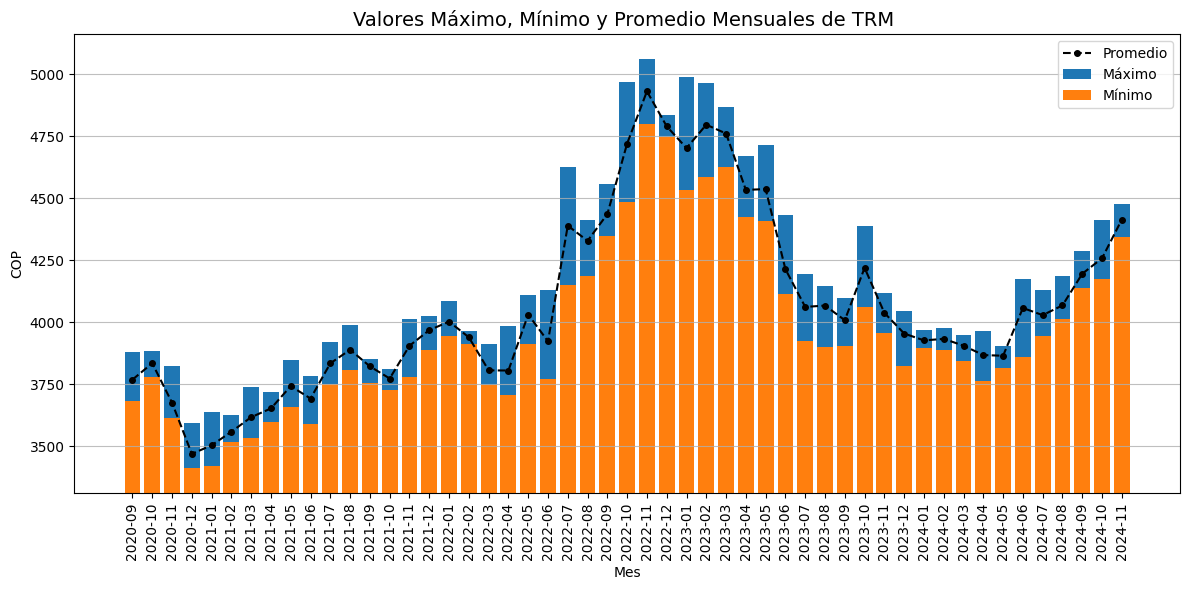

In [101]:
# Calcular valores máximo y mínimo mensuales
Max_Min_Mes = df.groupby(df['fecha'].dt.to_period('M'))['valor'].agg(['max', 'min']).reset_index()
Promedio = df.groupby(df['fecha'].dt.to_period('M'))['valor'].mean().reset_index()

# Crear gráfico de columnas
fig, ax = plt.subplots(figsize=(12, 6))
x = range(len(Max_Min_Mes))

#  Creando las barras
ax.bar(x, Max_Min_Mes['max'], label='Máximo')
ax.bar(x, Max_Min_Mes['min'], label='Mínimo')

# Creando la línea de valor promedio mensual
ax.plot(x, Promedio['valor'], color='black', marker='o',markersize = 4, linestyle='--',label = 'Promedio')

# Personalizando el gráfico
ax.set_title('Valores Máximo, Mínimo y Promedio Mensuales de TRM ', fontsize=14)
ax.set_xlabel('Mes',fontsize=10)
ax.set_ylabel('COP',fontsize=10)
ax.set_ylim(Max_Min_Mes['min'].min() - 100, Max_Min_Mes['max'].max() + 100)  # Acercamiento
ax.set_xticks(x)
ax.set_xticklabels(Max_Min_Mes['fecha'].astype(str), rotation=90)
ax.legend()
ax.grid(axis='y', alpha=0.8)

plt.tight_layout()
plt.show()

Esta gráfica nos permite reconocer algunas tendecias que tiene la tasa de cambio, al igual que algunos puntos de inflexión, máximo y minímos que pueden traducirse en eventos importantes para el mercado. Con un analisis mas profundo se podría llegar a identificar patrones de volatilidad e indagar por su relación con valores de otras tasas de cambio. A través de esto se podrían identificar periodos de riesgo u oportunidades de negocio.